## Before you start :
   - These exercises are related to the Exploratory data analysis using matplotlib and seaborn.
   - The datasets for Challenge 2 and 3 are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

# Challenge 1

Answer all questions by drawing a graph. Then explain.

In [40]:
import seaborn as sns
import pandas as pd


**0. Load seaborn dataset "tips"**

In [247]:
df=sns.load_dataset("tips")
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [248]:
df.sample(7)

,total_bill,tip,sex,smoker,day,time,size
70,12.02,1.97,Male,No,Sat,Dinner,2
69,15.01,2.09,Male,Yes,Sat,Dinner,2
182,45.35,3.50,Male,Yes,Sun,Dinner,3
67,3.07,1.00,Female,Yes,Sat,Dinner,1
17,16.29,3.71,Male,No,Sun,Dinner,3
60,20.29,3.21,Male,Yes,Sat,Dinner,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2


**1. What is the prefered day for eating?**

<AxesSubplot:xlabel='day', ylabel='count'>

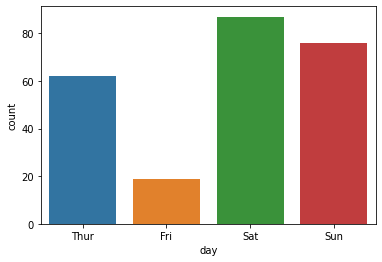

In [249]:
sns.countplot(x=df.day)

In [250]:
df.day.value_counts().idxmax()

'Sat'

**2. What days of the week has more men than women payers?**

/home/emilio/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

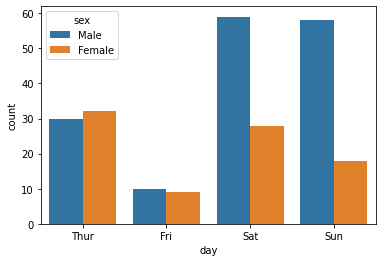

In [251]:
sns.countplot(df.day, hue=df.sex)

In [252]:
df2=df.groupby("day")["sex"].value_counts()
df2

day   sex   
Thur  Female    32
      Male      30
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: sex, dtype: int64

In [253]:
df_dias_vs_sex = pd.crosstab(df.sex, df.day)
display(df_dias_vs_sex)
df_dias_vs_sex.idxmax()
dias_cumplen=df_dias_vs_sex.values[0]<df_dias_vs_sex.values[1]
dias_cumplen

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


array([ True, False, False, False])

**3. Do you think bill amounts change considerably depending on smoking?**

In [254]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [255]:

df['tipppax'] = (df['tip']/df['size']).round(2)
df['tbillppax']= (df['total_bill']/df['size']).round(2)
df

,total_bill,tip,sex,smoker,day,time,size,tipppax,tbillppax
0,16.99,1.01,Female,No,Sun,Dinner,2,0.50,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,0.55,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,1.17,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,1.66,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,0.90,6.15
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.97,9.68
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.00,13.59
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.00,11.34
242,17.82,1.75,Male,No,Sat,Dinner,2,0.88,8.91


<AxesSubplot:xlabel='tbillppax', ylabel='tipppax'>

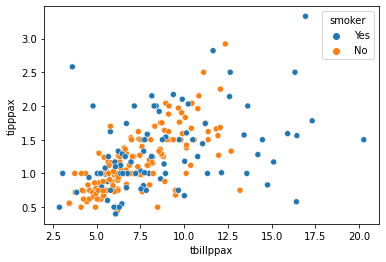

In [256]:
sns.scatterplot(x="tbillppax", y="tipppax", hue='smoker', data=df)

**4. Is tip correlated to total_bill? Draw a scatter plotsmok**

<AxesSubplot:xlabel='tipppax', ylabel='tbillppax'>

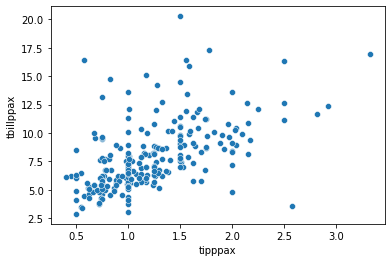

In [257]:
sns.scatterplot(x="tipppax", y="tbillppax", data=df)

In [263]:
df.corr().tipppax['tbillppax'].round(2)

0.54

In [187]:
print(f"Parece bastante alta: 0,68")

Parece bastante alta: 0,68


**BONUS**: Draw a graph of your choice with 2 numerical variables and 2 categorical variable (HINT: use `hue` and `style`). Do you find it useful?